In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
import evaluate
from datasets import load_dataset


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-07-25 22:40:50,650] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [73]:
rouge = evaluate.load('rouge')

In [2]:
test_accs_all = []
# ckpts = ["622", "1244", "1866", "2488", "3110", "3732", "4354", "4976", "5598", "6220"]
ckpts = ["311", "623", "935", "1246", "1558", "1866"]

for ckpt in ckpts:
    test_accs = (np.load("ckpts/gsm8k_orig_6epochs/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.max(axis=-1).mean())
    test_accs_all.append(test_accs.mean())

test_accs_all = np.array(test_accs_all)

0.1499620924943139
0.20849128127369218
0.2800606520090978
0.3065959059893859
0.32676269901440486
0.3390447308567096


In [39]:
# test_accs_all = []
# # ckpts = ["622", "1244", "1866", "2488", "3110", "3732", "4354", "4976", "5598", "6220"]
# ckpts = ["281", "562", "844", "1125", "1406", "1686"]

# for ckpt in ckpts:
#     test_accs = (np.load("ckpts/gsm8k_orig_6epochs_unmemorized/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
#     print(test_accs.mean())
#     # test_accs_all.append(test_accs.max(axis=-1).mean())
#     test_accs_all.append(test_accs.mean())

# test_accs_all = np.array(test_accs_all)

In [40]:
# test_accs_all = []
# # ckpts = ["622", "1244", "1866", "2488", "3110", "3732", "4354", "4976", "5598", "6220"]
# ckpts = ["281", "562", "844", "1125", "1406", "1686"]

# for ckpt in ckpts:
#     test_accs = (np.load("ckpts/gsm8k_orig_6epochs_unmemorized/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
#     print(test_accs.mean())
#     # test_accs_all.append(test_accs.max(axis=-1).mean())
#     test_accs_all.append(test_accs.mean())

# test_accs_all = np.array(test_accs_all)

In [3]:
dataset = load_dataset("gsm8k", "main")
train_questions = np.array(dataset["train"]["question"])
train_answers = np.array(dataset["train"]['answer'])

In [4]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

# ckpts = ["3332", "6664", "9996", "13328", "16660"]
ckpts = ["311", "623", "935", "1246", "1558", "1866"]
# ckpts = ["935"]
for ckpt in ckpts:
    
    
    train_correct = (np.load("ckpts/gsm8k_orig_6epochs/checkpoint-"+ckpt+ "/train_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/gsm8k_orig_6epochs/checkpoint-"+ckpt+ "/train_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []
    
    
    # predictions = []
    # references = []
    # predictions_idxs = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[input_idx].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
                # predictions.append(train_samples[input_idx][sample_idx].strip())
                # references.append(train_answers[input_idx].strip())
                # predictions_idxs.append(input_idx)
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    # results = rouge.compute(predictions=predictions, references=references, use_aggregator=False)
    # predictions_idxs = np.array(predictions_idxs)
    # for input_idx in range(len(train_correct)):
    #     num_memorized = 0
    #     num_correct_different = 0
    #     rouge_subsample_idxs = np.where(predictions_idxs==input_idx)[0]
        
    #     for idx in rouge_subsample_idxs:
    #         if results['rougeL'][idx]>=0.95:
    #             num_memorized+=1
    #         else:
    #             num_correct_different+=1
    #     num_memorized_ckpt.append(num_memorized)
    #     num_correct_different_ckpt.append(num_correct_different)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)
    
num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

In [18]:
# train_answers


# number of \n in train answers
num_newlines = np.array([len(answer.split("\n")) for answer in train_answers])

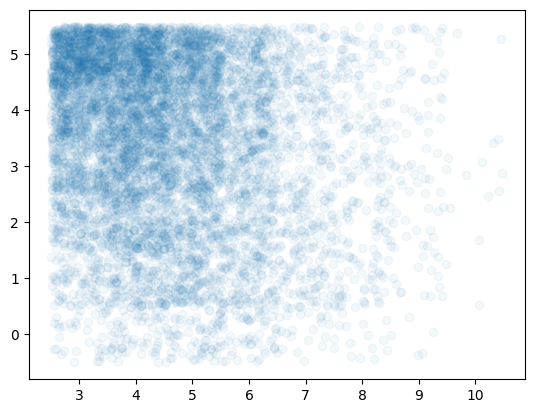

In [26]:
plt.scatter(num_newlines+np.random.uniform(-0.5, 0.5, len(num_newlines)), num_correct_different_all.max(axis=0)+np.random.uniform(-0.5, 0.5, len(num_newlines)), alpha=0.05)
plt.savefig("delete.png")

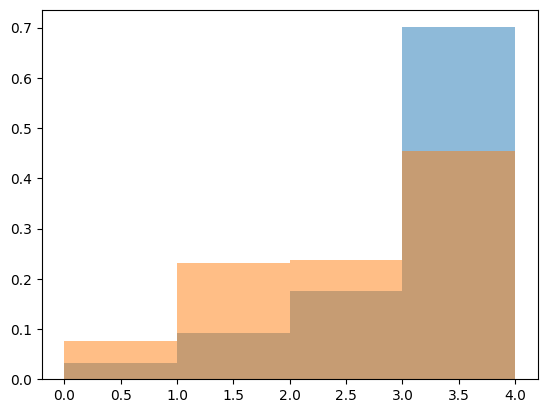

In [36]:
idxs = np.where(num_newlines==3)[0]

plt.hist(num_correct_different_all.max(axis=0)[idxs], alpha=0.5, density=True, bins = np.arange(0, 5, 1))
idxs = np.where(num_newlines>=7)[0]

plt.hist(num_correct_different_all.max(axis=0)[idxs], alpha=0.5, density=True, bins =  np.arange(0, 5, 1))
plt.savefig("delete.png")

In [17]:
num_correct_different_all.shape

(6, 7473)

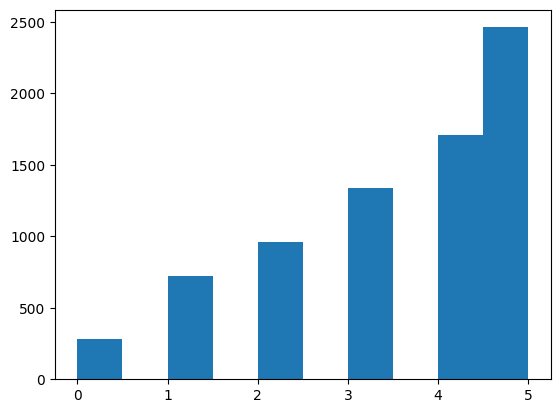

In [13]:
plt.hist(num_correct_different_all.max(axis=0))
plt.savefig("delete.png")

In [11]:
((num_correct_different_all.max(axis=0))>3).sum()

4172

In [5]:
np.save("ckpts/gsm8k_orig_6epochs/unmemorized_subsample_idxs.npy", np.where((num_correct_different_all.max(axis=0)>1))[0])

NameError: name 'num_correct_different_all' is not defined

In [28]:
len(np.where((num_correct_different_all.sum(axis=0)>1))[0])

6748

In [26]:
np.save("ckpts/gsm8k_orig_6epochs/memorized_subsample_idxs.npy", np.where((num_correct_different_all.sum(axis=0)>11))[0][:725])

In [40]:
(np.load("ckpts/gsm8k_orig_6epochs/checkpoint-"+str(623)+ "/train_answers5_seed2.npy"))[52]

array([' If each friend received eight pencils, then the total number of pencils is 5*8=<<5*8=40>>40 pencils.\nIf Arnel had 10 boxes of pencils, then each box had 40/10=<<40/10=4>>4 pencils.\n#### 4',
       ' Arnel shared 5 x 8 = <<5*8=400>>400 pencils with his friends.\nThus, there are 400 - 10 = <<400-10=390>>390 pencils in the 10 boxes.\nTherefore, each box has 390/10 = <<390/10=39>>39 pencils.\n#### 39',
       ' If Arnel shared eight pencils with each of his five friends, then he gave away 8*5 = <<8*5=400>>400 pencils.\nThus, he had 400-10 = <<400-10=390>>390 pencils.\nTherefore, each box had 390/10 = <<390/10=39>>39 pencils.\n#### 39',
       ' If he shared eight pencils each with his five friends, then he had 8*5=<<8*5=40>>40 pencils\nIf he kept ten pencils, then he had 40-10=<<40-10=30>>30 pencils\nSince the number of pencils was the same in each box, then each box had 30/10=<<30/10=3>>3 pencils.\n#### 3',
       ' If Arnel had 5 friends, and each friend got 8 pencils, then th

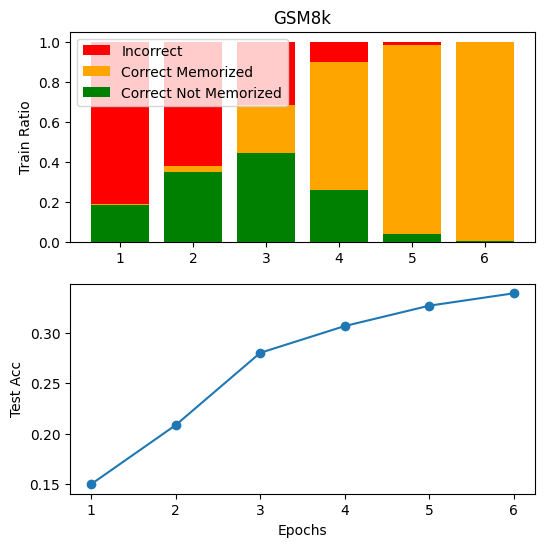

In [5]:
# make 2 subplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.bar([i for i in range(1, 7)], [1 for i in range(6)], color = "red", label = "Incorrect")
ax1.bar([i for i in range(1, 7)], [1-(num_incorrect_all/5).mean(axis=1)[i] for i in range(6)], color = "orange", label = "Correct Memorized")
ax1.bar([i for i in range(1, 7)], [1-(num_incorrect_all/5).mean(axis=1)[i]-(num_memorized_all/5).mean(axis=1)[i] for i in range(6)], color = "green", label = "Correct Not Memorized")
ax1.set_xticks([i for i in range(1, 7)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("GSM8k")
ax1.legend()

ax2.plot([i for i in range(1, 7)], test_accs_all, "o-")
ax2.set_xticks([i for i in range(1, 7)])
ax2.set_ylabel("Test Acc")
ax2.set_xlabel("Epochs")
plt.savefig("delete.png")

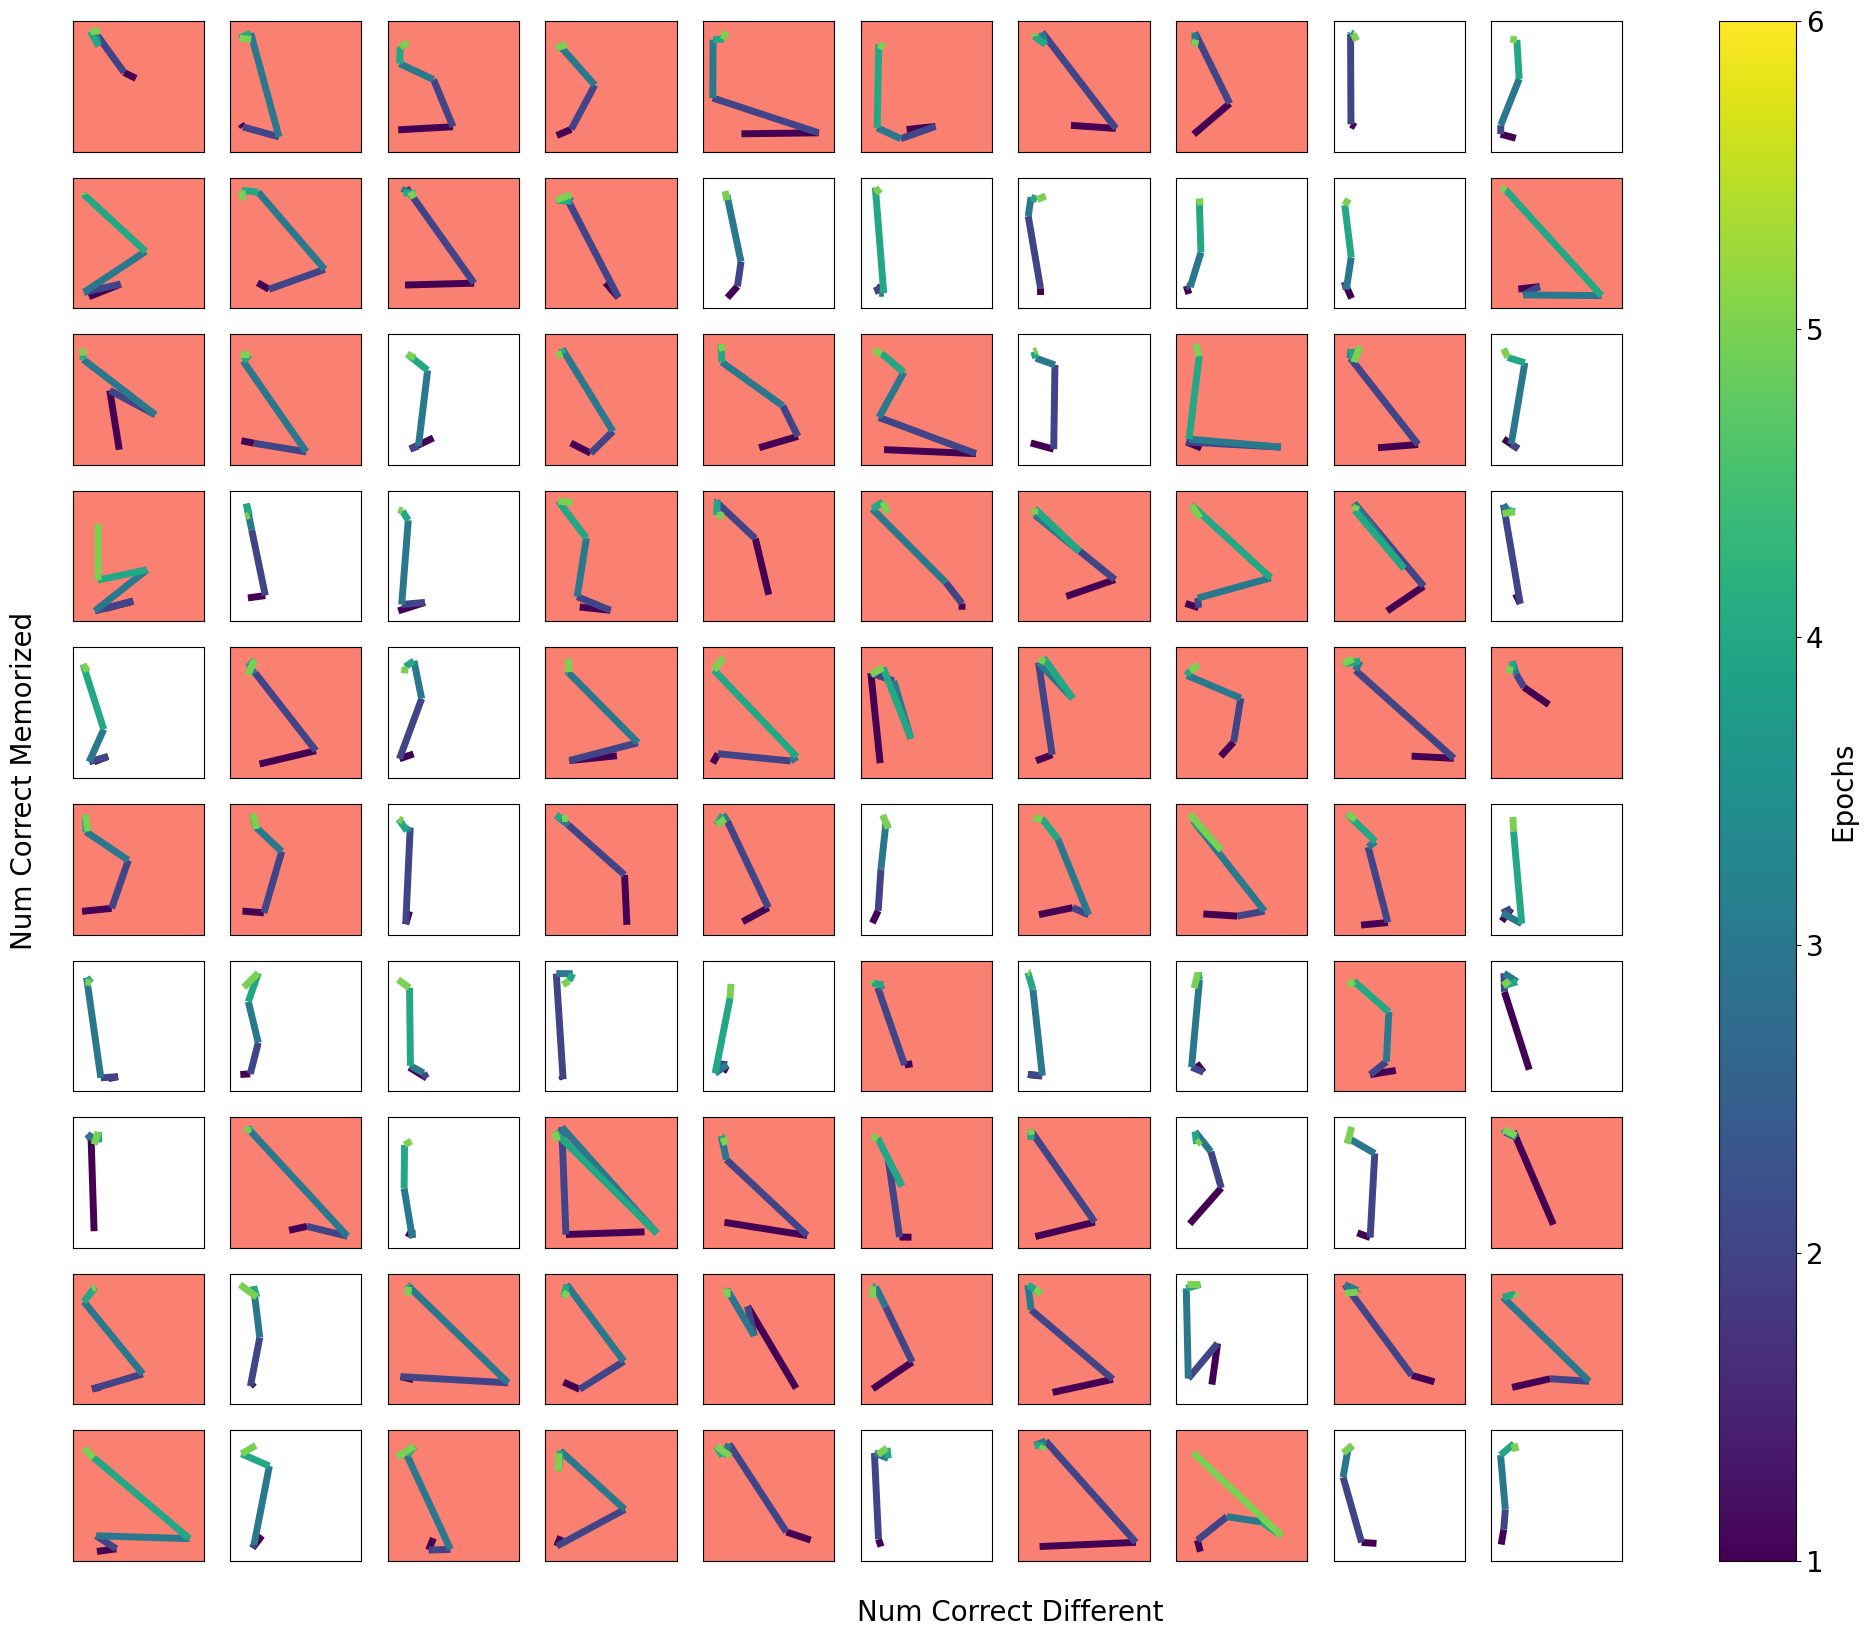

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 6, 6)




for i in range(100):
    x = num_correct_different_all[:, i]+np.random.uniform(-0.5, 0.5, 6)
    y = num_memorized_all[:, i]+np.random.uniform(-0.5, 0.5, 6)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(1, 6), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")

In [61]:
num_memorized_all.shape 

(6, 7473)

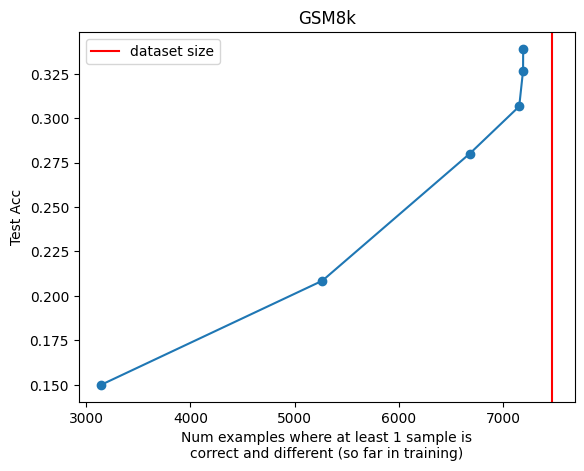

In [20]:
cummulative_num_correct_different = []
for i in range(6):
    cummulative_num_correct_different.append((num_correct_different_all[:i+1,].max(axis=0)>=1).sum())
    # cummulative_num_correct_different.append((num_correct_different_all[:i+1,]).max(axis=0).mean())
    # cummulative_num_correct_different.append(num_correct_different_all[:i+1,].sum())
    # cummulative_num_correct_different.append(num_correct_different_all[:i+1,].sum())





plt.plot(cummulative_num_correct_different, test_accs_all, "o-")

# plt.xlim(3000,  7473)
plt.axvline(7473, color = "red", label = "dataset size")
plt.xlabel("Num examples where at least 1 sample is\ncorrect and different (so far in training)")
plt.ylabel("Test Acc")
plt.legend()
plt.title("GSM8k")
plt.savefig("delete.png")

In [9]:
len(num_correct_different_all[0])

7473

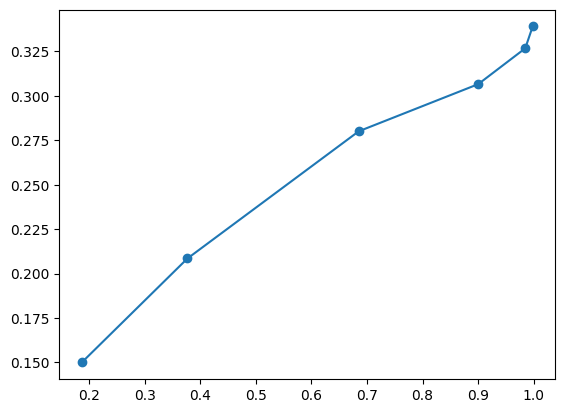

In [65]:
plt.plot(1-(num_incorrect_all/5).mean(axis=1), test_accs_all, "o-")
plt.savefig("delete.png")

In [10]:
cummulative_num_correct_different

[1831, 4101, 5989, 6692, 6746, 6748]

In [11]:
test_accs_all

array([0.36087945, 0.42608036, 0.48521607, 0.49052312, 0.49431387,
       0.51175133])